In [155]:
%matplotlib inline

import pandas as pd
import csv
import scipy
from sklearn import svm, preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

In [174]:
df = pd.read_csv("train.csv")
# df = df[pd.notnull(df['Age'])]
df['Sex'] = df['Sex'].replace('male',1).replace('female',2)
print(df.head(1))
df['Cabin'].unique()


   PassengerId  Survived  Pclass                     Name  Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris    1  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [80]:
X = df[['Fare', 'Age']].values
y = df['Survived'].values
X = preprocessing.scale(X)

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
print(clf.predict(np.array([[1,10]])))

[0]


[ 1.03050605 -0.10301903]


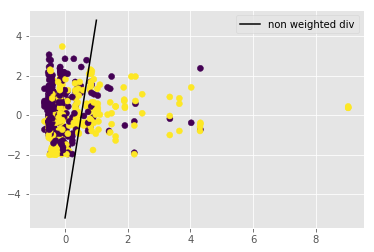

In [83]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [183]:
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']

def Build_Data_Set():
    data_df = pd.DataFrame.from_csv("train.csv")

    data_df = data_df[pd.notnull(data_df['Age'])]
    data_df['Sex'] = data_df['Sex'].replace('male',1).replace('female',2)
    data_df['Cabin'] = data_df['Cabin'][1]
    data_df['Cabin'] = data_df['Cabin'].fillna(value='U')
    data_df['Cabin'] = data_df['Cabin'].replace('A',1).replace('B',2).replace('C',3).replace('D',4).replace('E',5).replace('F',6).replace('U',7)
    
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    
    X = np.array(data_df[FEATURES].values)#.tolist())

    y = data_df['Survived'].values

    X = preprocessing.scale(X)

    return X,y

def Analysis():

    test_size = 200
    X, y = Build_Data_Set()
    print(len(X))

    
    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X[:-test_size],y[:-test_size])

    correct_count = 0

    for x in range(1, test_size+1):
        if clf.predict([X[-x]])[0] == y[-x]:
            correct_count += 1

    print("Accuracy:", (correct_count/test_size) * 100.00)

Analysis()

714
Accuracy: 77.5


In [141]:
# deep dive into cabins
# df['Cabin'] = df['Cabin'].str[:1]
print(len(df))
df[['Cabin','PassengerId', 'Fare', 'Age']].groupby(['Cabin']).agg(['count', 'mean'])


891


PassengerId              Fare               Age           
            count        mean count        mean count       mean
Cabin                                                           
A              15  439.600000    15   39.623887    12  44.833333
B              47  521.808511    47  113.505764    45  34.955556
C              59  406.440678    59  100.151341    51  36.086667
D              33  475.939394    33   57.244576    31  39.032258
E              32  502.437500    32   46.026694    30  38.116667
F              13  370.384615    13   18.696792    11  19.954545
G               4  216.000000     4   13.581250     4  14.750000
T               1  340.000000     1   35.500000     1  45.000000

In [233]:
FEATURES = ['Survived','Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch', 'Fare']


data_df = pd.DataFrame.from_csv("train.csv")

data_df = data_df[pd.notnull(data_df['Age'])]
data_df['Sex'] = data_df['Sex'].replace('male',1).replace('female',2)

data_df['Cabin'] = data_df['Cabin'][1]
data_df['Cabin'] = data_df['Cabin'].fillna(value='U')
data_df['Cabin'] = data_df['Cabin'].replace('A',1).replace('B',2).replace('C',3).replace('D',4).replace('E',5).replace('F',6).replace('U',7)

data_df.reset_index()

data_df = data_df[FEATURES]

X = data_df.values[:, 1::]
y = data_df.values[:, 0]

# Fit a random forest with (mostly) default parameters to determine feature importance
forest = RandomForestClassifier(oob_score=True, n_estimators=10000)
forest.fit(X, y)
feature_importance = forest.feature_importances_
print(feature_importance)

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)

[ 0.09633003  0.2505596   0.29287026  0.          0.04602158  0.0375739
  0.27664464]
[  32.89170638   85.5531044   100.            0.           15.71398323
   12.82953634   94.45979354]


[0 1 2 4 5 6]
n 6 Important features(> 0 % of max importance):n ['Pclass' 'Sex' 'Age' 'Cabin' 'SibSp' 'Parch']
nFeatures sorted by importance (DESC):n ['Age' 'Parch' 'Sex' 'Pclass' 'Cabin' 'SibSp']


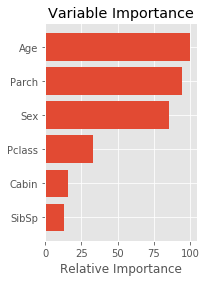

IndexError: index 5 is out of bounds for axis 1 with size 5

In [244]:

# A threshold below which to drop features from the final data set. Specifically, this number represents
# the percentage of the most important feature's importance value
fi_threshold = 0

# Get the indexes of all features over the importance threshold
important_idx = np.where(feature_importance > fi_threshold)[0]
print(important_idx)

# Create a list of all the feature names above the importance threshold
important_features = np.array(FEATURES[1:-1])
print("n", important_features.shape[0], "Important features(>", fi_threshold, "% of max importance):n", important_features)

# Get the sorted indexes of important features
sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
print("nFeatures sorted by importance (DESC):n", important_features[sorted_idx])

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center')
plt.yticks(pos, important_features[sorted_idx[::-1]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.draw()
plt.show()

# Remove non-important features from the feature set, and reorder those remaining
X = X[:, important_idx][:, sorted_idx]

In [242]:
print(FEATURES)
print(FEATURES[1:-1])

['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch', 'Fare']
['Pclass', 'Sex', 'Age', 'Cabin', 'SibSp', 'Parch']
